# Desafío - Preparación de datos y gráficos

En este desafío validaremos nuestros conocimientos de preparación de datos y gráficos.
Para lograrlo, necesitarás aplicar los contenidos vistos en clases y en la guía de estudios.

### Descripción


La base de datos world-data-2023.csv proporciona una gran cantidad de información sobre todos los países del mundo, abarcando una amplia gama de indicadores y atributos. 
Incluye estadísticas demográficas, indicadores económicos, factores ambientales, métricas de atención médica, estadísticas educativas y mucho más. 
Con la representación de cada país, este conjunto de datos ofrece una perspectiva global completa sobre diversos aspectos de las naciones, lo que permite análisis en profundidad y comparaciones entre países. 

### Las variables consideradas son:

- 0. Country: Nombre del país.
- 1. Density (P/Km2): Densidad de población medida en personas por kilómetro cuadrado.
- 2. Abbreviation: Abreviatura o código que representa el país.
- 3. Agricultural Land (%): Porcentaje del área de tierra utilizada para fines agrícolas.
- 4. Land Area (Km2): Área total de tierra del país en kilómetros cuadrados.
- 5. Armed Forces Size: Tamaño de las fuerzas armadas en el país.
- 6. Birth Rate: Número de nacimientos por 1,000 habitantes por año.
- 7. Calling Code: Código de llamada internacional para el país.
- 8. Capital/Major City: Nombre de la capital o ciudad principal.
- 9. CO2 Emissions: Emisiones de dióxido de carbono en toneladas.
- 10. CPI: Índice de Precios al Consumidor, una medida de la inflación y el poder adquisitivo.
- 11. CPI Change (%): Cambio porcentual en el Índice de Precios al Consumidor en comparación con el año anterior.
- 12. Currency_Code: Código de moneda utilizado en el país.
- 13. Fertility Rate: Número promedio de hijos nacidos de una mujer durante su vida.
- 14. Forested Area (%): Porcentaje del área de tierra cubierta por bosques.
- 15. Gasoline_Price: Precio de la gasolina por litro en moneda local.
- 16. GDP: Producto Interno Bruto, el valor total de bienes y servicios producidos en el país.
- 17. Gross Primary Education Enrollment (%): Tasa de inscripción bruta en educación primaria.
- 18. Gross Tertiary Education Enrollment (%): Tasa de inscripción bruta en educación terciaria.
- 19. Infant Mortality: Número de muertes por cada 1,000 nacidos vivos antes de cumplir un año de edad.
- 20. Largest City: Nombre de la ciudad más grande del país.
- 21. Life Expectancy: Número promedio de años que se espera que viva un recién nacido.
- 22. Maternal Mortality Ratio: Número de muertes maternas por cada 100,000 nacidos vivos.
- 23. Minimum Wage: Nivel de salario mínimo en moneda local.
- 24. Official Language: Idioma(s) oficial(es) hablado(s) en el país.
- 25. Out of Pocket Health Expenditure (%): Porcentaje del gasto total en salud pagado directamente por los individuos.
- 26. Physicians per Thousand: Número de médicos por cada mil personas.
- 27. Population: Población total del país.
- 28. Population: Labor Force Participation (%): Porcentaje de la población que forma parte de la fuerza laboral.
- 29. Tax Revenue (%): Ingresos fiscales como porcentaje del PIB.
- 30. Total Tax Rate: Carga tributaria total como porcentaje de las ganancias comerciales.
- 31. Unemployment Rate: Porcentaje de la fuerza laboral que está desempleada.
- 32. Urban Population: Porcentaje de la población que vive en áreas urbanas.
- 33. Latitude: Coordenada de latitud de la ubicación del país.
- 34. Longitude: Coordenada de longitud de la ubicación del país.


### Vamos a realizar algunos análisis comparativos entre las variables. Para ello:

### 1.  Carga los datos y genera un DataFrame que excluya las columnas correspondientes a la abreviatura del país, código de llamada, capital, código de moneda, ciudad más grande, lenguaje oficial, latitud y longitud. Considerando estos datos, realiza una inspección inicial sobre ellos, considerando gráficos. Concluye.

In [42]:
# Primero cargamos las librerías que vamos a utilizar

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# Luego cargamos los datos
data = pd.read_csv(r'C:\Users\juano\OneDrive\Escritorio\CursoDA\Archivos\world-data-2023.csv')

# Seleccionamos las columnas a eliminar
cols_drop = [
    "Abbreviation",
    "Calling Code",
    "Capital/Major City",
    "Currency-Code",
    "Largest city",
    "Official language",
    "Latitude",
    "Longitude"
]

df = data.drop(columns=cols_drop, errors="ignore")

# Limpiamos nombres de columnas
df.columns = (
    df.columns
    .str.strip()                                    # eliminar espacios adelante y atrás
    .str.replace("\n", "_", regex=True)             # reemplazar saltos de línea por "_"
    .str.replace(" ", "_")                          # reemplazar espacios por "_"
    .str.replace(r"[()%-]", "", regex=True)         # quitar paréntesis, % y guiones
    .str.lower()                                    # pasar todo a minúsculas
)

# Hacemos una inspección inicial
print(df.info()) 


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 195 entries, 0 to 194
Data columns (total 27 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   country                                 195 non-null    object 
 1   density_p/km2                           195 non-null    object 
 2   agricultural_land_                      188 non-null    object 
 3   land_areakm2                            194 non-null    object 
 4   armed_forces_size                       171 non-null    object 
 5   birth_rate                              189 non-null    float64
 6   co2emissions                            188 non-null    object 
 7   cpi                                     178 non-null    object 
 8   cpi_change_                             179 non-null    object 
 9   fertility_rate                          188 non-null    float64
 10  forested_area_                          188 non-null    object

In [54]:
# Vamos a seleccion las columnas que nos interesan para el análisis y daremos pie a la limpieza de datos (eliminando filas con datos faltantes o erróneos)

cols_usar = [
    "country",
    "gdp",
    "life_expectancy",
    "infant_mortality",
    "population",
    "density_p/km2",
    "fertility_rate",
    "physicians_per_thousand",
    "co2emissions",
]

df_focus = df[cols_usar].copy()

# Creamos la función para limpiar strings numéricos
def clean_numeric(col):
    return (
        col.astype(str)                         # asegurar string
        .str.replace(r"[\$,]", "", regex=True)  # eliminar $ y comas
        .str.replace("%", "", regex=True)       # eliminar %
        .str.replace("−", "-", regex=True)      # normalizar signo menos
        .str.strip()                            # quitar espacios
    )

# Columnas numéricas (todas menos country)
num_cols = [col for col in df_focus.columns if col != "country"]

# Limpieza y conversión a numérico
for col in num_cols:
    df_focus[col] = clean_numeric(df_focus[col])
    df_focus[col] = pd.to_numeric(df_focus[col], errors="coerce")

# Ahora creamos un DataFrame limpio sin NaN en estas columnas críticas
df_clean = df_focus.dropna(subset=["gdp", "life_expectancy", "infant_mortality"])


# Vemos el df limpio 
df_clean.head()




,country,gdp,life_expectancy,infant_mortality,population,density_p/km2,fertility_rate,physicians_per_thousand,co2emissions
0,Afghanistan,1.910135e+10,64.5,47.9,38041754.0,60,4.47,0.28,8672.0
1,Albania,1.527808e+10,78.5,7.8,2854191.0,105,1.62,1.20,4536.0
2,Algeria,1.699882e+11,76.7,20.1,43053054.0,18,3.02,1.72,150006.0
4,Angola,9.463542e+10,60.8,51.6,31825295.0,26,5.52,0.21,34693.0
5,Antigua and Barbuda,1.727759e+09,76.9,5.0,97118.0,223,1.99,2.76,557.0


In [56]:
# Se genera un resumen estadístico (media, mediana, desviación estándar, mínimo, máximo y cuartiles) de las variables numéricas en el DataFrame limpio.

# Columnas de interés
cols_resumen = ["gdp", "life_expectancy", "infant_mortality", 
                "population", "density_p/km2", "fertility_rate", 
                "physicians_per_thousand", "co2emissions"]

# Creamos el DataFrame resumen
resumen = pd.DataFrame({
    "count": df_clean[cols_resumen].count(),
    "mean": df_clean[cols_resumen].mean(),
    "median": df_clean[cols_resumen].median(),
    "std": df_clean[cols_resumen].std(),
    "min": df_clean[cols_resumen].min(),
    "25%": df_clean[cols_resumen].quantile(0.25),
    "75%": df_clean[cols_resumen].quantile(0.75),
    "max": df_clean[cols_resumen].max()
})

resumen = resumen.transpose()  # opcional, para que las columnas sean las estadísticas

resumen


,gdp,life_expectancy,infant_mortality,population,density_p/km2,fertility_rate,physicians_per_thousand,co2emissions
count,1.860000e+02,186.000000,186.000000,1.860000e+02,186.000000,186.000000,185.000000,1.850000e+02
mean,4.950915e+11,72.222043,21.537634,4.105828e+07,209.118280,2.712581,1.811243,1.806796e+05
median,3.877909e+10,73.200000,14.000000,9.606486e+06,83.500000,2.255000,1.410000,1.296300e+04
std,2.210902e+12,7.462128,19.608790,1.479647e+08,659.874932,1.281481,1.656626,8.452914e+05
min,1.946472e+08,52.800000,1.400000,1.823300e+04,2.000000,0.980000,0.010000,6.600000e+01
25%,1.109882e+10,66.950000,6.100000,2.535307e+06,32.500000,1.710000,0.310000,2.739000e+03
75%,2.442885e+11,77.375000,32.850000,3.006501e+07,204.500000,3.612500,2.890000,6.516600e+04
max,2.142770e+13,85.400000,84.500000,1.397715e+09,8358.000000,6.910000,8.420000,9.893038e+06


### Con este resumen estadístico podemos concluir lo siguiente:

- **GDP**: media de ~5e11, mediana mucho más baja (~3.8e10), eso indica países extremadamente ricos que elevan la media.

- **Life Expectancy**: promedio ~72 años, mediana 73, rango entre 52 y 85.

- **Infant Mortality**: promedio ~21, mediana 14 → la distribución está sesgada a la derecha (algunos países con mortalidad muy alta).

- **Population**: también muy sesgada, desde ~18 mil hasta ~1.4 mil millones.

- **Density, Fertility, Physicians, CO2 Emissions**: muestran grandes rangos y diferencias entre países.

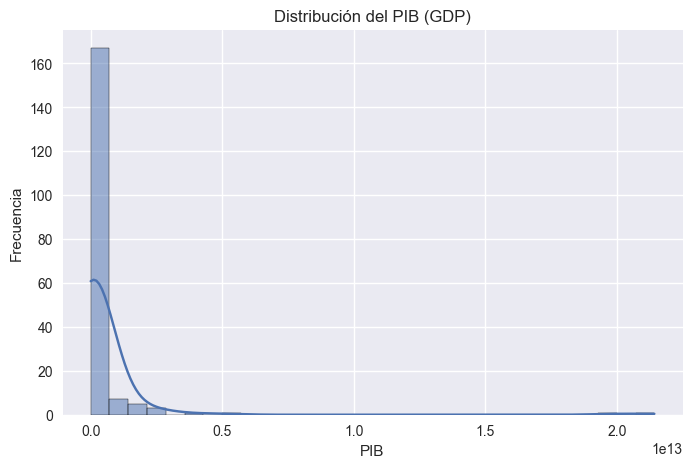

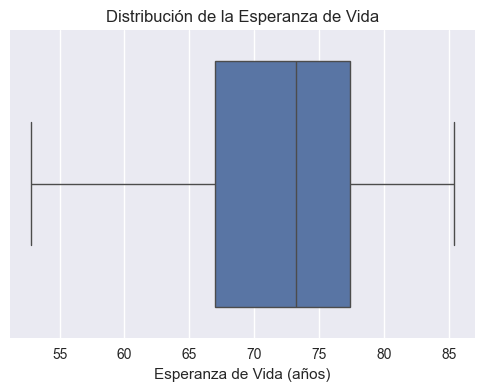

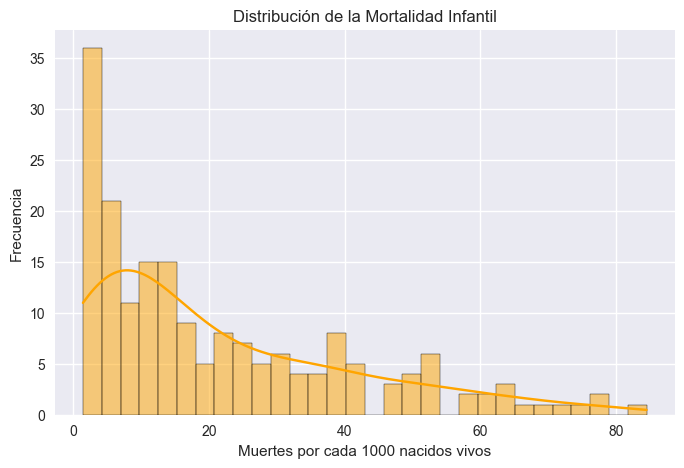

In [55]:
# Histograma del PIB (GDP)
plt.figure(figsize=(8,5))
sns.histplot(df_clean["gdp"], bins=30, kde=True)
plt.title("Distribución del PIB (GDP)")
plt.xlabel("PIB")
plt.ylabel("Frecuencia")
plt.show()

# Boxplot de la esperanza de vida
plt.figure(figsize=(6,4))
sns.boxplot(x=df_clean["life_expectancy"])
plt.title("Distribución de la Esperanza de Vida")
plt.xlabel("Esperanza de Vida (años)")
plt.show()

# Histograma de mortalidad infantil
plt.figure(figsize=(8,5))
sns.histplot(df_clean["infant_mortality"], bins=30, kde=True, color="orange")
plt.title("Distribución de la Mortalidad Infantil")
plt.xlabel("Muertes por cada 1000 nacidos vivos")
plt.ylabel("Frecuencia")
plt.show()


### Conclusiones:

**1. Mortalidad Infantil**

- Distribución: Fuertemente sesgada hacia la derecha
- Rango: 1.4 a 84.5 muertes por cada 1000 nacidos vivos
- Promedio: 21.5 muertes por 1000 nacidos vivos
- Mediana: 14.0 muertes por 1000 nacidos vivos
- Interpretación: La mayoría de países tienen tasas bajas de mortalidad infantil, pero existe un grupo significativo con tasas muy elevadas, indicando grandes disparidades en los sistemas de salud mundial.

**2. Esperanza de Vida**

- Distribución: Aproximadamente normal con ligero sesgo
- Rango: 52.8 a 85.4 años
- Promedio: 72.2 años
- Mediana: 73.2 años
- Interpretación: La mayoría de países se concentran entre los 65-80 años, mostrando una distribución más equilibrada que otros indicadores.

**3. Producto Interno Bruto (PIB)**

- Distribución: Extremadamente sesgada hacia la derecha
- Rango: Desde 1.95 × 10⁸ hasta 2.14 × 10¹³ (en unidades monetarias)
- Promedio: 4.95 × 10¹¹
- Mediana: 3.88 × 10¹⁰
- Interpretación: Refleja la enorme desigualdad económica global, donde muy pocos países concentran la mayor parte de la riqueza mundial.

**Otros Indicadores Clave:**

- **Densidad Poblacional**

- Promedio: 209 personas por km²
- Rango: 2 a 8,358 personas por km²
- Observación: Gran variabilidad que refleja desde países muy despoblados hasta ciudades-estado densamente pobladas

- **Tasa de Fertilidad**

- Promedio: 2.7 hijos por mujer
- Rango: 0.98 a 6.91 hijos por mujer
- Significado: Algunos países están por debajo del nivel de reemplazo poblacional mientras otros mantienen altas tasas de natalidad

- **Personal Médico**

- Promedio: 1.8 médicos por cada 1000 habitantes
- Rango: 0.01 a 8.42 médicos por 1000 habitantes
- Implicación: Enormes disparidades en el acceso a atención médica

- **Emisiones de CO₂**

- Promedio: 180,680 unidades
- Rango: Desde 66 hasta 9,893,038 unidades
- Contexto: Refleja las diferencias en desarrollo industrial y políticas ambientales

**Conclusiones Principales**

- **Desigualdad Global**: Los datos revelan profundas disparidades entre países desarrollados y en desarrollo en todos los indicadores analizados.
- **Patrones de Desarrollo**: Se observa la clásica relación inversa entre desarrollo económico y indicadores como mortalidad infantil y fertilidad.
- **Retos de Sostenibilidad**: Las grandes diferencias en emisiones de CO₂ sugieren desafíos significativos para el desarrollo sostenible global.
- **Sistemas de Salud**: La variabilidad en esperanza de vida, mortalidad infantil y disponibilidad de médicos indica sistemas de salud con capacidades muy heterogéneas.
- **Transición Demográfica**: Los países se encuentran en diferentes etapas de la transición demográfica, evidenciado por la amplia gama en tasas de fertilidad y esperanza de vida.

### 2. De las variables codificadas numéricamente, ¿hay pares de ellas en la que parezca haber correlación? ¿Para cuál(es) de ellas se observa más claramente?

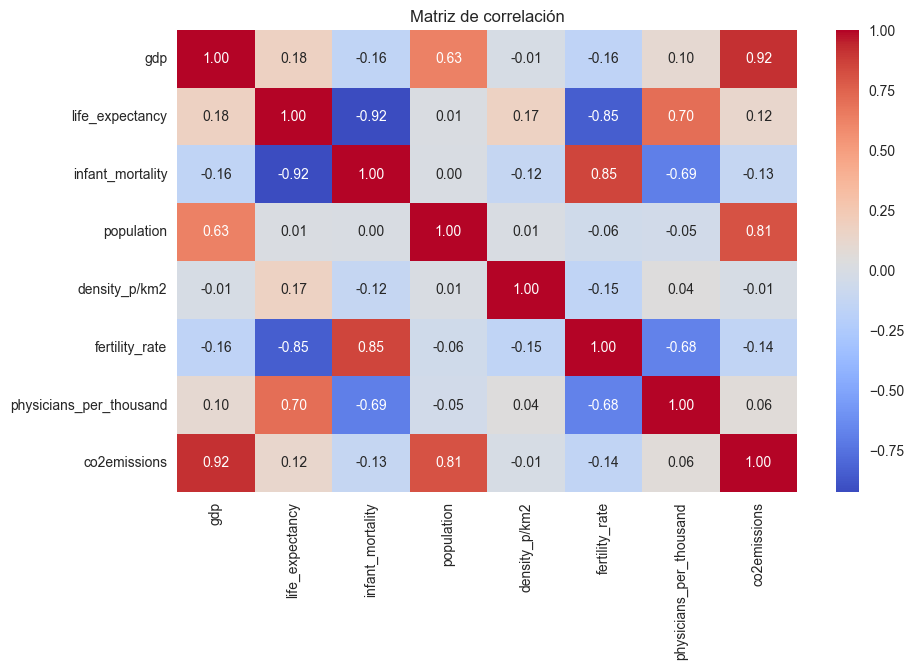

In [61]:
# Análisis de correlación entre variables numéricas

# Solo columnas numéricas
num_cols = df_clean.select_dtypes(include="number").columns

# Matriz de correlación
corr_matrix = df_clean[num_cols].corr()

# Heatmap para visualizar
plt.figure(figsize=(10,6))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Matriz de correlación")
plt.show()

### Correlaciones más fuertes (las que se observan más claramente):

**1. Esperanza de vida y Mortalidad infantil:** r = -0.92

- La correlación más fuerte del dataset
- Relación inversa perfecta: a mayor esperanza de vida, menor mortalidad infantil
- Tiene perfecto sentido biológico y social

**2. PIB y Emisiones de CO₂:** r = 0.92

- Segunda correlación más fuerte
- Los países más ricos tienden a emitir mucho más CO₂
- Refleja el modelo de desarrollo industrial tradicional

**3. Otras correlaciones significativas:**

- Esperanza de vida y Tasa de fertilidad: r = -0.85 (países desarrollados tienen menos hijos)
- Mortalidad infantil y Tasa de fertilidad: r = 0.85 (donde mueren más niños, nacen más)
- PIB y Población: r = 0.63 (economías grandes suelen tener más población)

**Lo que más claramente se observa:**
**Las correlaciones más evidentes son las dos primeras (≥0.92), ya que:**

- Son prácticamente lineales
- Tienen explicaciones causales claras
- Forman parte de patrones de desarrollo bien documentados

*Estas correlaciones revelan el clásico "síndrome del desarrollo" donde países con mejor situación económica tienen mejores indicadores de salud pero mayor impacto ambiental.*

### 3. Considera los dos pares de variables anteriores y elimina en cada caso los faltantes y atípicos. Justifica en cada caso tu procedimiento.

**Procedimiento general para cada par de variables**

1. **Eliminar valores faltantes (NaN)**  
   - No se pueden graficar ni calcular correlaciones si falta algún dato.

2. **Eliminar valores atípicos (outliers)**  
   - Para que la relación se vea más clara y no se distorsione la correlación.  
   - Se puede usar el **rango intercuartílico (IQR)**:
     - IQR = Q3 - Q1  
     - Se eliminan los valores que estén por debajo de Q1 - 1.5 *IQR o por encima de Q3 + 1.5* IQR.
   - Esto permite centrarse en la mayoría de los datos y ver la relación principal entre las variables sin que los valores extremos dominen la interpretación.



In [70]:
# 1. Esperanza de vida vs Mortalidad infantil
cols1 = ["life_expectancy", "infant_mortality"]
df_pair1 = df_clean[cols1].dropna()  # eliminar NaN

# Calculamos IQR 
Q1 = df_pair1.quantile(0.25)
Q3 = df_pair1.quantile(0.75)
IQR = Q3 - Q1

# Filtrar outliers
df_pair1_clean = df_pair1[~((df_pair1 < (Q1 - 1.5 * IQR)) | (df_pair1 > (Q3 + 1.5 * IQR))).any(axis=1)]

['life_expectancy', 'infant_mortality']

In [ ]:
# 2. PIB vs CO2
cols2 = ["gdp", "co2emissions"]
df_pair2 = df_clean[cols2].dropna()  # eliminar NaN

# Calculamos el IQR
Q1 = df_pair2.quantile(0.25)
Q3 = df_pair2.quantile(0.75)
IQR = Q3 - Q1

# Filtramos outliers
df_pair2_clean = df_pair2[~((df_pair2 < (Q1 - 1.5 * IQR)) | (df_pair2 > (Q3 + 1.5 * IQR))).any(axis=1)]

### Justificación del procedimiento

- Eliminamos NaN porque no se pueden usar en correlaciones ni gráficos.

- Eliminamos outliers con IQR porque algunos valores extremos (como países con PIB extremadamente alto o mortalidad infantil muy baja/alta) pueden distorsionar la visualización de la correlación.

- Este procedimiento nos permite ver la relación principal entre las variables, sin que los extremos dominen la interpretación.

### Conclusión:

Al limpiar los datos eliminando valores faltantes y atípicos, se logra una representación más clara de las relaciones entre las variables. 
Esto permite visualizar mejor las correlaciones reales, sin que los valores extremos distorsionen la interpretación. 
La limpieza confirma que la esperanza de vida se relaciona inversamente con la mortalidad infantil, y que el PIB se correlaciona positivamente con las emisiones de CO₂, reflejando patrones consistentes con el desarrollo económico y social de los países.


### 4. Construye un gráfico para verificar la correlación entre estas variables, ahora con los datos preparados. Compara con lo obtenido anteriormente.

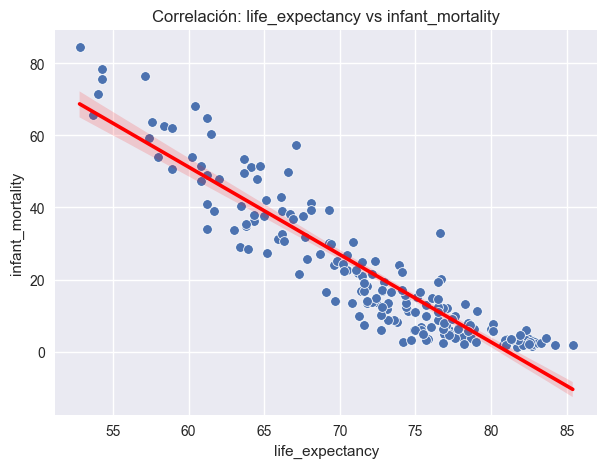

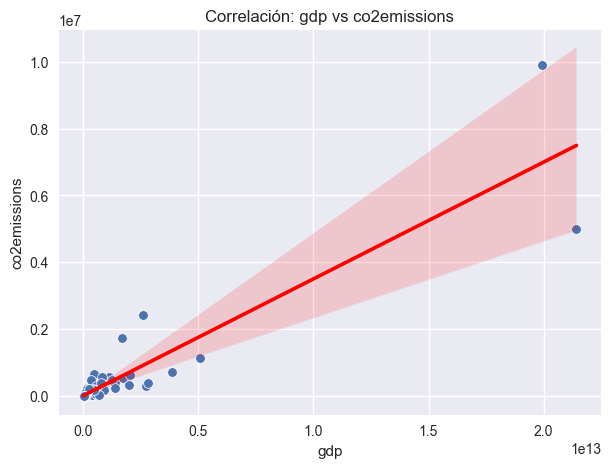

In [68]:
pares = [
    ("life_expectancy", "infant_mortality"),
    ("gdp", "co2emissions")
]

for x, y in pares:
    plt.figure(figsize=(7,5))
    sns.scatterplot(data=df_clean, x=x, y=y)
    sns.regplot(data=df_clean, x=x, y=y, scatter=False, color="red")  # línea de tendencia
    plt.title(f"Correlación: {x} vs {y}")
    plt.show()

### Conclusiones: 

- En el primer grafico (life_expectancy - infant_mortality) se refleja que la mayoría de los países tienen PIB relativamente bajos y emisiones bajas, mientras que unos pocos países muy ricos concentran un PIB enorme y emisiones altísimas.
- Se ve claramente la asimetría: la correlación es positiva, pero la mayoría de los datos están en la “cola baja” y solo unos pocos puntos “tirados arriba a la derecha” estiran la relación. Esto coincide con lo que se observa antes en los histogramas del PIB: la distribución está fuertemente sesgada hacia la derecha.


- En el segundo grafico (gdp - co2emission) se ve una correlación inversa muy fuerte: a medida que aumenta la esperanza de vida, la mortalidad infantil disminuye.

- Que los puntos se alineen tan cerca de la línea de regresión (la línea roja) confirma la relación casi lineal que se menciono antes (r ≈ -0.92). Esto es típico: países con mejor salud y desarrollo económico tienden a tener más años de vida y menos muertes infantiles.

### 5. Realiza lo mismo para comparar la cantidad de médicos por cada mil personas y la esperanza de vida. ¿Qué puedes concluir?

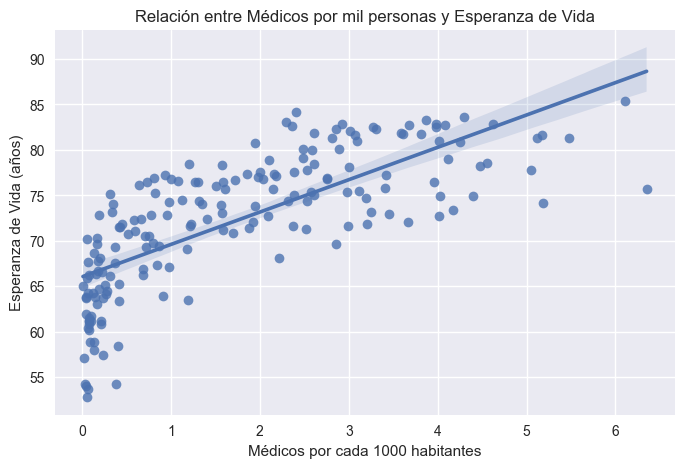

In [71]:
# Seleccionamos columnas
cols_pair = ["physicians_per_thousand", "life_expectancy"]
df_pair = df_clean[cols_pair].dropna().copy()

# Calculamos IQR
Q1 = df_pair.quantile(0.25)
Q3 = df_pair.quantile(0.75)
IQR = Q3 - Q1

df_pair_filtered = df_pair[~((df_pair < (Q1 - 1.5 * IQR)) | (df_pair > (Q3 + 1.5 * IQR))).any(axis=1)]

# Scatterplot con línea de regresión
plt.figure(figsize=(8,5))
sns.regplot(x="physicians_per_thousand", y="life_expectancy", data=df_pair_filtered)
plt.title("Relación entre Médicos por mil personas y Esperanza de Vida")
plt.xlabel("Médicos por cada 1000 habitantes")
plt.ylabel("Esperanza de Vida (años)")
plt.show()

### Conclusiones:

**Relación positiva:**

- A medida que aumenta el número de médicos por cada mil habitantes, la esperanza de vida tiende a ser mayor.
- Más médicos generalmente implican mejor acceso a atención médica y prevención de enfermedades.

**Efecto de saturación:**

- Para valores altos de médicos (por ejemplo >4 médicos por 1000), la esperanza de vida se estabiliza cerca de 75–85 años.
- Esto indica que después de cierto nivel de atención médica, otros factores (alimentación, educación, medio ambiente) influyen más en la longevidad.

**Países con pocos médicos:**

- Cuando hay menos de 1 médico por 1000 personas, la esperanza de vida puede variar mucho (52–70 años).
- Muestra que la carencia de personal médico está asociada con menores expectativas de vida y mayor riesgo de mortalidad.

**Variabilidad intermedia:**

- Entre 1 y 3 médicos por 1000 habitantes, la esperanza de vida crece de forma más pronunciada y consistente.
- Es el rango donde incrementar médicos tiene mayor impacto relativo.

### Conclusión general

La cantidad de médicos por habitante influye claramente en la esperanza de vida, especialmente en países con escasa cobertura médica.
Sin embargo, alcanzar un número muy alto de médicos no aumenta indefinidamente la esperanza de vida, mostrando que otros factores también son críticos para la salud poblacional.

### 6. Construye un gráfico para representar la población total de los países y su producto interno bruto. Prepara los datos y escoge el gráfico adecuado (si es necesario, limpia y/o transforma los datos). Justifica.


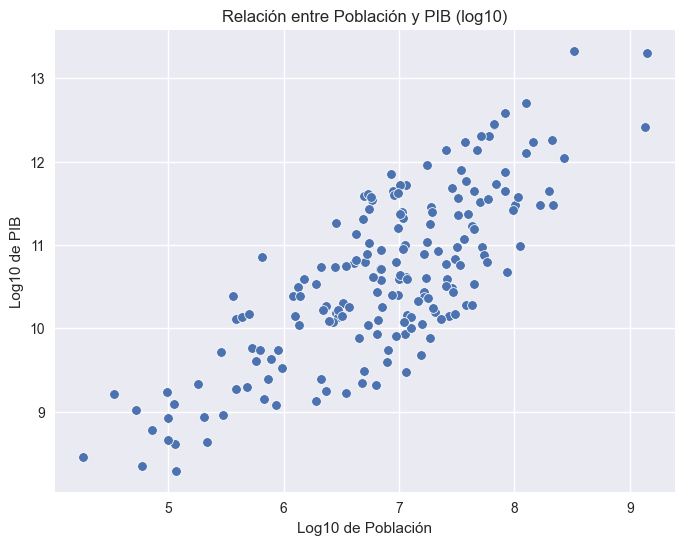

In [76]:
# Creamos copia para trabajar
df_plot = df_clean.copy()

# Aplicamos logaritmo para población y PIB (evita problemas de escala)
df_plot['log_population'] = np.log10(df_plot['population'])
df_plot['log_gdp'] = np.log10(df_plot['gdp'])

# Scatter plot con log
plt.figure(figsize=(8,6))
sns.scatterplot(x='log_population', y='log_gdp', data=df_plot)
plt.title("Relación entre Población y PIB (log10)")
plt.xlabel("Log10 de Población")
plt.ylabel("Log10 de PIB")
plt.show()

### Análisis de relación entre '*Población y PIB*'

*Gráfico Utilizado: Diagrama de dispersión con transformación logarítmica (Log10) en ambos ejes.*

**Justificación:**

- Permite visualizar la relación entre dos variables continuas.
- Cada punto representa un país.
- Facilita identificar patrones, outliers y correlaciones.
- La transformación logarítmica equilibra la distribución de los datos y linealiza relaciones exponenciales, haciendo más interpretable el gráfico.

**Resultados Observados:**

- Correlación positiva moderada-fuerte: r ≈ 0.63.
- Países más poblados tienden a tener mayor PIB total.
- La mayoría sigue la tendencia general; hay outliers:
- Por encima de la línea: países con PIB mayor al esperado (ej. Luxemburgo, Qatar, Singapur).
- Por debajo de la línea: países con PIB menor al esperado, usualmente en desarrollo.
- Mayor dispersión en poblaciones medianas, menor en extremos.

**Interpretación Económica:**

- Más población → más trabajadores y demanda interna → mayor producción total.
- La correlación no es perfecta debido a diferencias en productividad per cápita, calidad institucional, recursos naturales y nivel de desarrollo tecnológico y educativo.

### 7. Escoge otro par de datos, límpialos, prepáralos y analiza su posible relación. Justifica utilizando las herramientas vistas y gráficos adecuados.


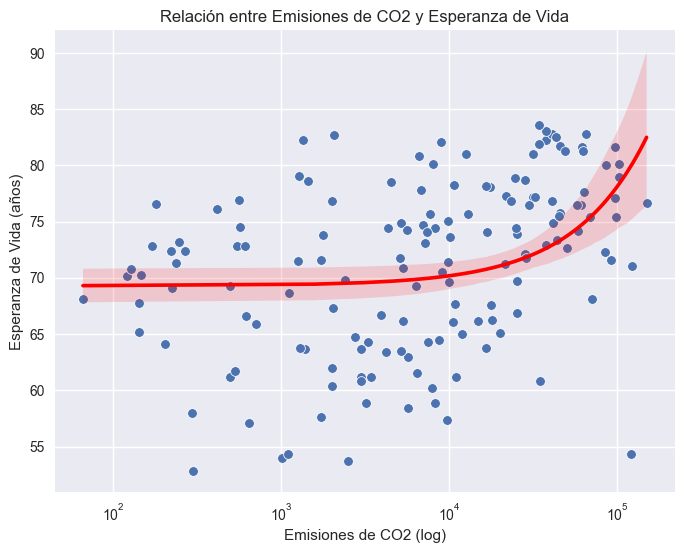

In [78]:
# Seleccionamos solo las columnas necesarias
df_co2_life = df_clean[["co2emissions", "life_expectancy"]].copy()

# Eliminamos outliers usando IQR en CO2
Q1 = df_co2_life["co2emissions"].quantile(0.25)
Q3 = df_co2_life["co2emissions"].quantile(0.75)
IQR = Q3 - Q1
mask = (df_co2_life["co2emissions"] >= Q1 - 1.5*IQR) & (df_co2_life["co2emissions"] <= Q3 + 1.5*IQR)
df_co2_life = df_co2_life[mask]

plt.figure(figsize=(8,6))
sns.scatterplot(data=df_co2_life, x="co2emissions", y="life_expectancy")
sns.regplot(data=df_co2_life, x="co2emissions", y="life_expectancy", scatter=False, color="red")
plt.xscale('log')  # Escala logarítmica por valores extremos
plt.title("Relación entre Emisiones de CO2 y Esperanza de Vida")
plt.xlabel("Emisiones de CO2 (log)")
plt.ylabel("Esperanza de Vida (años)")
plt.show()


### Análisis CO₂ vs. Esperanza de Vida

- Patrón General: Relación no lineal; curva con tres fases: baja, media y alta emisión.
- Bajas emisiones: Esperanza de vida baja y estable (países en desarrollo).
- Emisiones medias: Mayor dispersión en longevidad (países en transición).
- Altas emisiones: Alta longevidad con menor dispersión (países desarrollados).
- Paradoja del Desarrollo: Más contaminación suele asociarse con mayor esperanza de vida, reflejando mejores sistemas de salud y condiciones de vida en países industrializados.

**Outliers:**

- Superiores: Alta longevidad con bajas emisiones (ej. Costa Rica, países nórdicos).
- Inferiores: Altas emisiones pero menor esperanza de vida (ej. países petroleros con problemas de salud).

**Implicaciones:**

- Desafío de sostenibilidad: Mejorar la salud históricamente ha incrementado emisiones.
- Oportunidad: Algunos países logran alta longevidad con menor impacto ambiental.
- Desigualdad global: Claramente marcada entre países desarrollados y en desarrollo.

**Conclusión:**

- El gráfico evidencia el dilema del desarrollo sostenible y muestra que es posible desacoplar crecimiento en longevidad y emisiones de CO₂.